In [127]:
!pip install statsmodels==0.12.2 

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
import warnings 
warnings.simplefilter('ignore')

In [129]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import math  

In [130]:
df = pd.read_csv('Electric_Production.csv')
df

,DATE,IPG2211A2N
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212




---



**a) Tests for Stationarity**

1. ADF test

In [131]:
#define function for ADF test
def adf_test(atr):
    timeseries = df[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('IPG2211A2N')

Results of Dickey-Fuller Test for  IPG2211A2N 

Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


2. KPSS test

In [132]:
#define function for kpss test
def kpss_test(atr):
    timeseries = df[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('IPG2211A2N')

Results of KPSS Test for  IPG2211A2N
Test Statistic            2.206192
p-value                   0.010000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


From ADF and KPSS test, the given time series data named "Electric_Production" is non stationary.

3. ACF Test

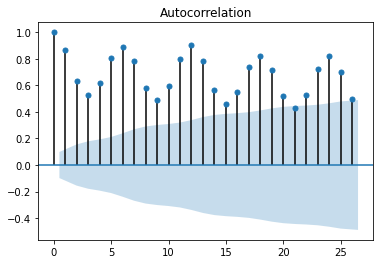

In [133]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['IPG2211A2N'])
plt.show()

4. PACF Test

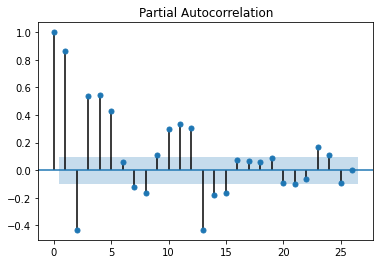

In [134]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['IPG2211A2N'])
plt.show()

From ACF and PACF, we can see that there are spikes in the data after some intervals, thus we can say that the data is seasonal.
Also, since more than 5% of the ACF and PACF plots are outside the shaded reagion, thus, we can say that the data is non-stationary.



---



**b) Dataset Graph**

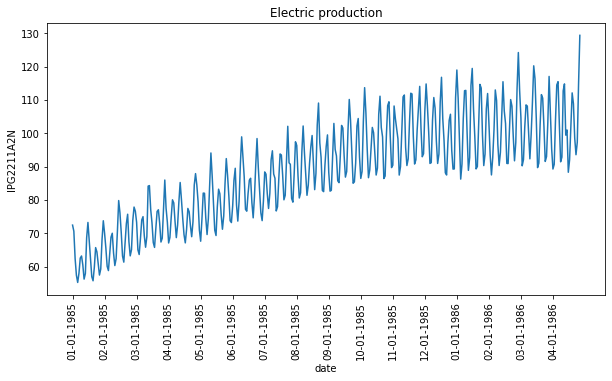

In [135]:
plt.figure(figsize=(10,5))
plt.plot(df['IPG2211A2N'])
plt.xticks([i for i in range(0,396,25)],df.DATE, rotation=90)
plt.xlabel("date")
plt.ylabel("IPG2211A2N")
plt.title('Electric production')
plt.show()

In [136]:
df['meanRoll'] = df['IPG2211A2N'].rolling(5).mean()
df['stdRoll'] = df['IPG2211A2N'].rolling(5).std()

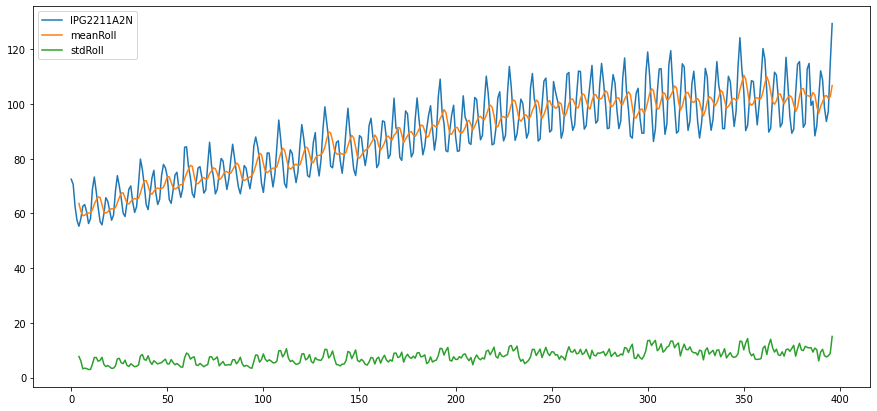

In [137]:
df.plot(figsize=[15,7])
df.drop(df.columns[-2:],axis=1,inplace=True)

By seeing the graph above, we can see a seasonality in the data, as there are spikes in the plot.
Also, by observing the graph, we can see that the mean is not constant here, rather it is increasing, thus it is non-stationary. 

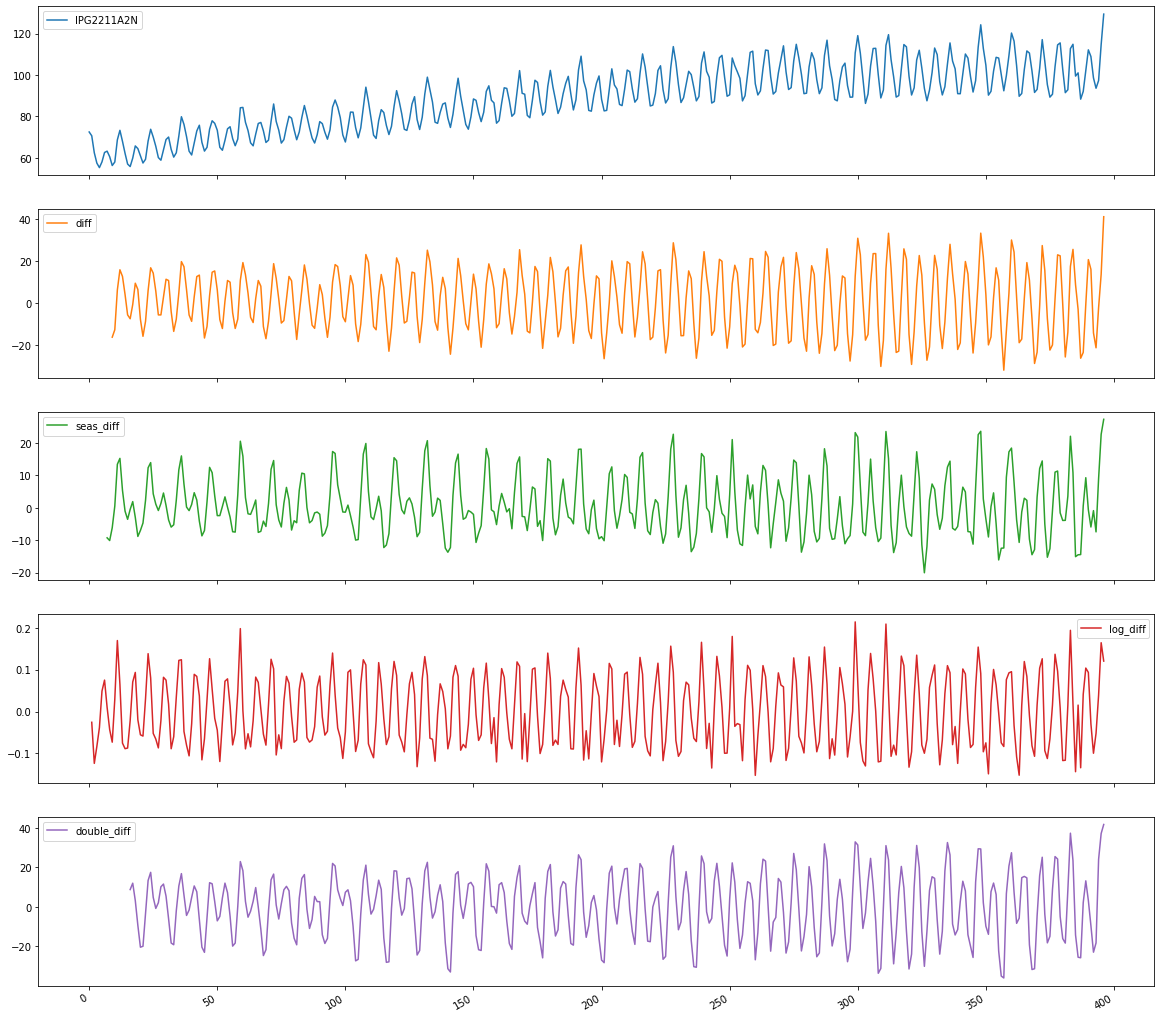

In [138]:
# Differencing
df['diff'] = df['IPG2211A2N'].diff(periods=9)

# Seasonal Differencing
df['seas_diff'] = df['IPG2211A2N'].diff(periods=7)

# Transformation (here we use log transformation)
df_log = np.log(df['IPG2211A2N'])
df['log_diff'] = df_log.diff(periods=1)

df['double_diff'] = df['seas_diff'].diff(periods=9)

df.plot(subplots=True, figsize=(20,20))
plt.show()

In [139]:
adf_test('diff')
print("\n")
kpss_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                -6.226866e+00
p-value                        5.063716e-08
#Lags Used                     1.700000e+01
Number of Observations Used    3.700000e+02
Critical Value (1%)           -3.448148e+00
Critical Value (5%)           -2.869383e+00
Critical Value (10%)          -2.570948e+00
dtype: float64


Results of KPSS Test for  diff
Test Statistic            0.271746
p-value                   0.100000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [140]:
adf_test('seas_diff')
print("\n")
kpss_test('seas_diff')

Results of Dickey-Fuller Test for  seas_diff 

Test Statistic                  -4.904878
p-value                          0.000034
#Lags Used                      17.000000
Number of Observations Used    372.000000
Critical Value (1%)             -3.448052
Critical Value (5%)             -2.869341
Critical Value (10%)            -2.570926
dtype: float64


Results of KPSS Test for  seas_diff
Test Statistic            0.117583
p-value                   0.100000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [141]:
adf_test('log_diff')
print("\n")
kpss_test('log_diff')

Results of Dickey-Fuller Test for  log_diff 

Test Statistic                -6.748333e+00
p-value                        2.995161e-09
#Lags Used                     1.400000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64


Results of KPSS Test for  log_diff
Test Statistic            0.11078
p-value                   0.10000
Lags Used                17.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [142]:
adf_test('double_diff')
print("\n")
kpss_test('double_diff')

Results of Dickey-Fuller Test for  double_diff 

Test Statistic                -9.857322e+00
p-value                        4.324693e-17
#Lags Used                     1.500000e+01
Number of Observations Used    3.650000e+02
Critical Value (1%)           -3.448394e+00
Critical Value (5%)           -2.869491e+00
Critical Value (10%)          -2.571006e+00
dtype: float64


Results of KPSS Test for  double_diff
Test Statistic            0.065571
p-value                   0.100000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


From ADF and KPSS test, the differenced data becomes stationary.
Here the data is first seasonal differenced and then simple differencing is done.



---



c),d),e),f)

**AR model**

In [143]:
# Defining mean function 
def mean_func(arr):
  sum=0
  for i in arr:
    sum = sum +i
  mean = sum/len(arr)
  return mean

# Defining my own function for NSE
def nse(e,s):
  diff = []
  num_sum = 0
  denom_sum = 0
  for i,j in zip(e, s):
    diff.append(i-j)
  for i in diff:
    num_sum = num_sum + i**2
  for k in e:
    denom_sum = denom_sum + (k-(mean_func(e)))**2
  nse = 1-(num_sum/denom_sum) 
  return nse 

In [144]:
#Defining rsquared
def rsquared(arr1,arr2):
  sum1=0
  sum2=0
  sum3=0
  mu1=mean(arr1)
  mu2=mean(arr2)
  for i, j in zip(arr1, arr2):
    sum1+=((i-mu1)*(j-mu2))
  for i in arr1:
    sum2+=((i-mu1)**2)
  for j in arr2:
    sum3+=((j-mu2)**2)
  corr=sum1/(math.sqrt(sum2*sum3))
  rsquared=corr**2
  return rsquared

RMSE of different interval for AR model is :  8.733272652077549
RSquared of different interval for AR model is :  0.8047855219591319
nse of different interval for AR model is :  0.8045509161369016


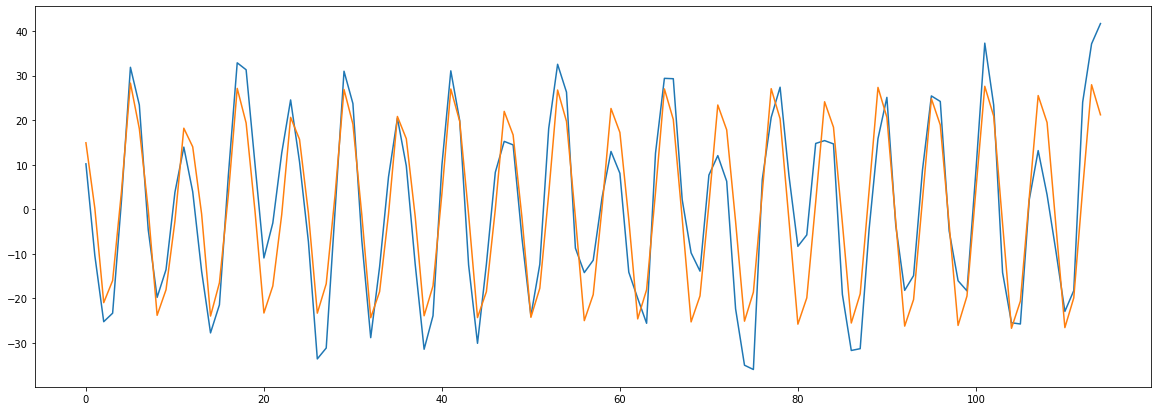

RMSE of different interval for AR model is :  9.023916096229135
RSquared of different interval for AR model is :  0.8008010489076147
nse of different interval for AR model is :  0.7862111240982422


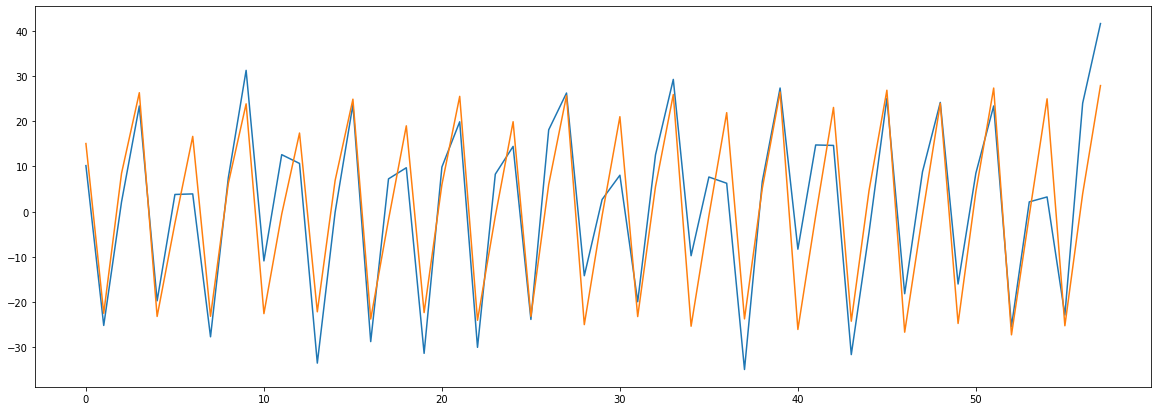

RMSE of different interval for AR model is :  10.263279954379518
RSquared of different interval for AR model is :  0.07574381533065815
nse of different interval for AR model is :  0.0749934166608267


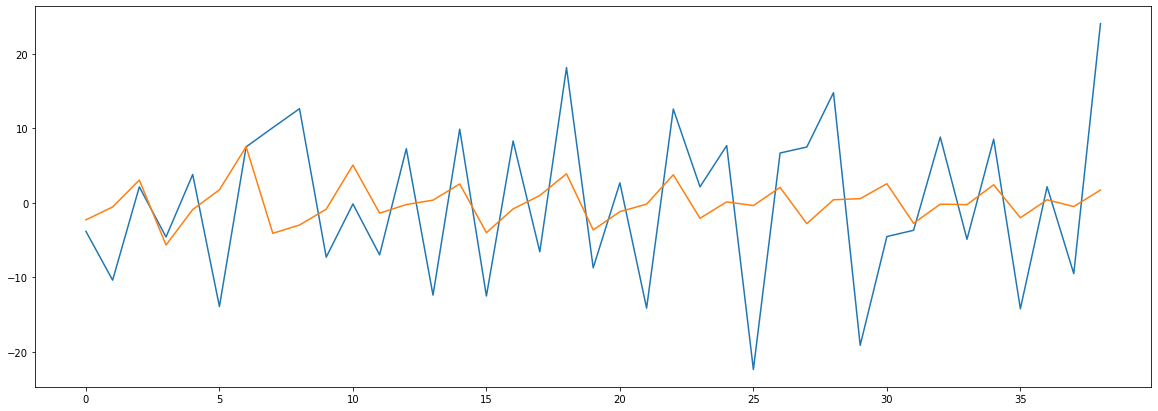

RMSE of different interval for AR model is :  7.431914758996519
RSquared of different interval for AR model is :  0.9021353401382822
nse of different interval for AR model is :  0.8978095317393278


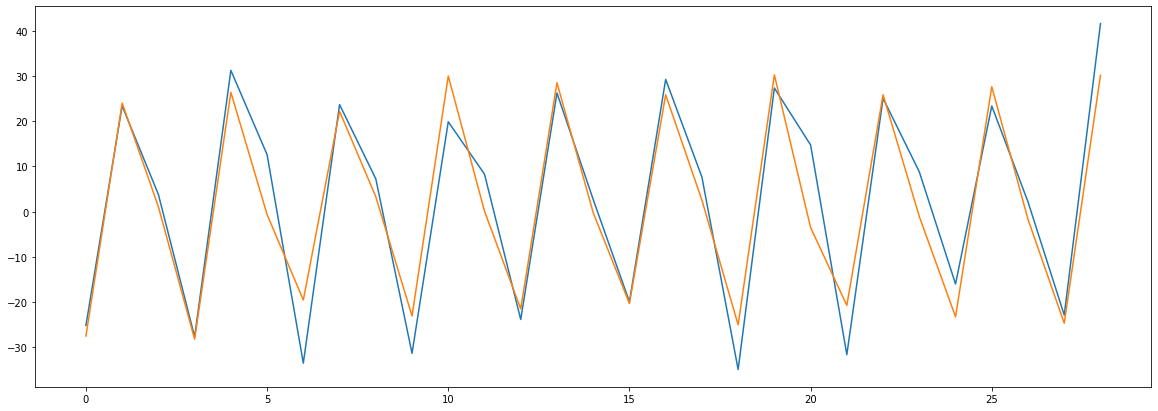

In [145]:
data1 = df['double_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = AutoReg(train, lags=15)
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for AR model is : ",rmse)
  print("RSquared of different interval for AR model is : ",r_squared)
  print("nse of different interval for AR model is : ",nse1)
  plt.figure(figsize=(20,7))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [146]:
data = df['seas_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = AutoReg(train, lags=15)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for AR model is : ",rmse)
print("RSquared for AR model is : ",r_squared)
print("nse for AR model is : ",nse1)

RMSE for AR model is :  5.855013794544197
RSquared for AR model is :  0.7146866092745692
nse for AR model is :  0.7052079286293658


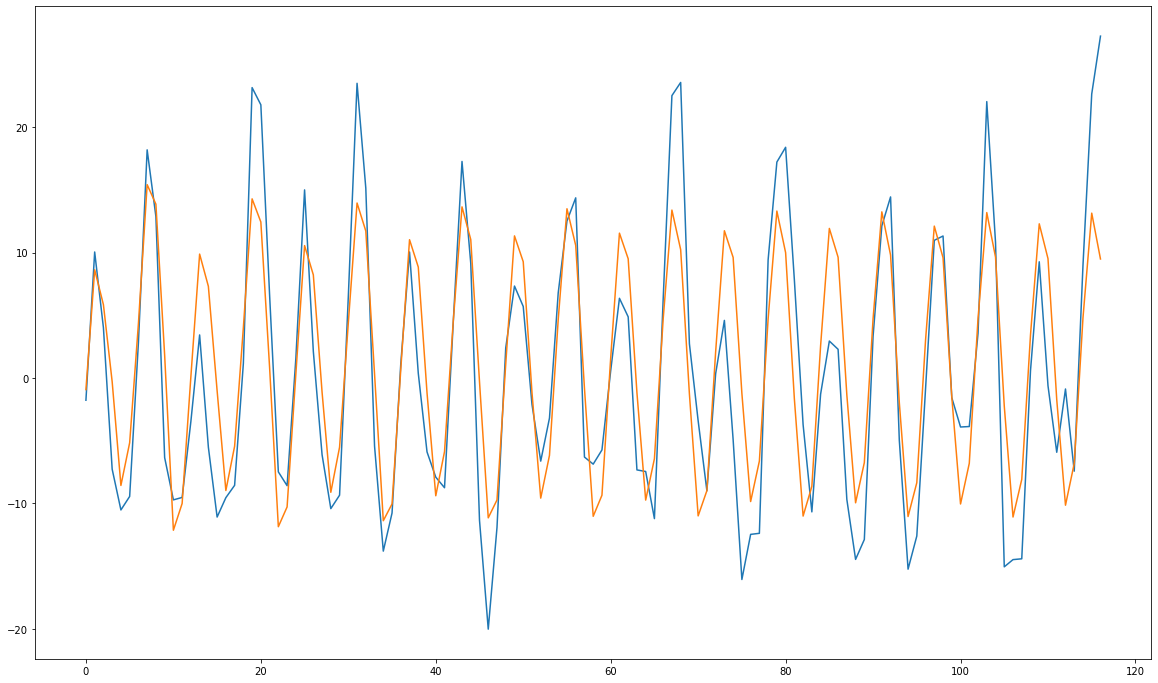

In [147]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

**MA model**

RMSE of different interval for MA model is :  25.04373544847073
RSquared of different interval for MA model is :  0.6005783570924962
nse of different interval for MA model is :  -0.6072292070157526


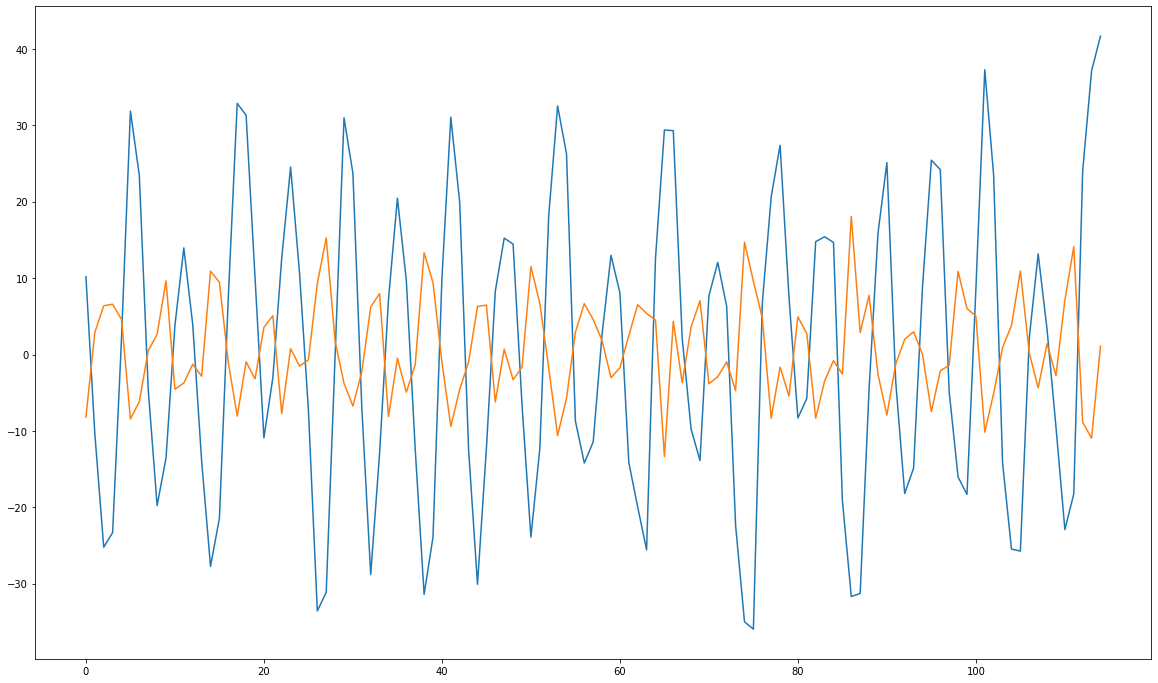

RMSE of different interval for MA model is :  20.090246704795696
RSquared of different interval for MA model is :  0.0006747809808607697
nse of different interval for MA model is :  -0.059657572998355946


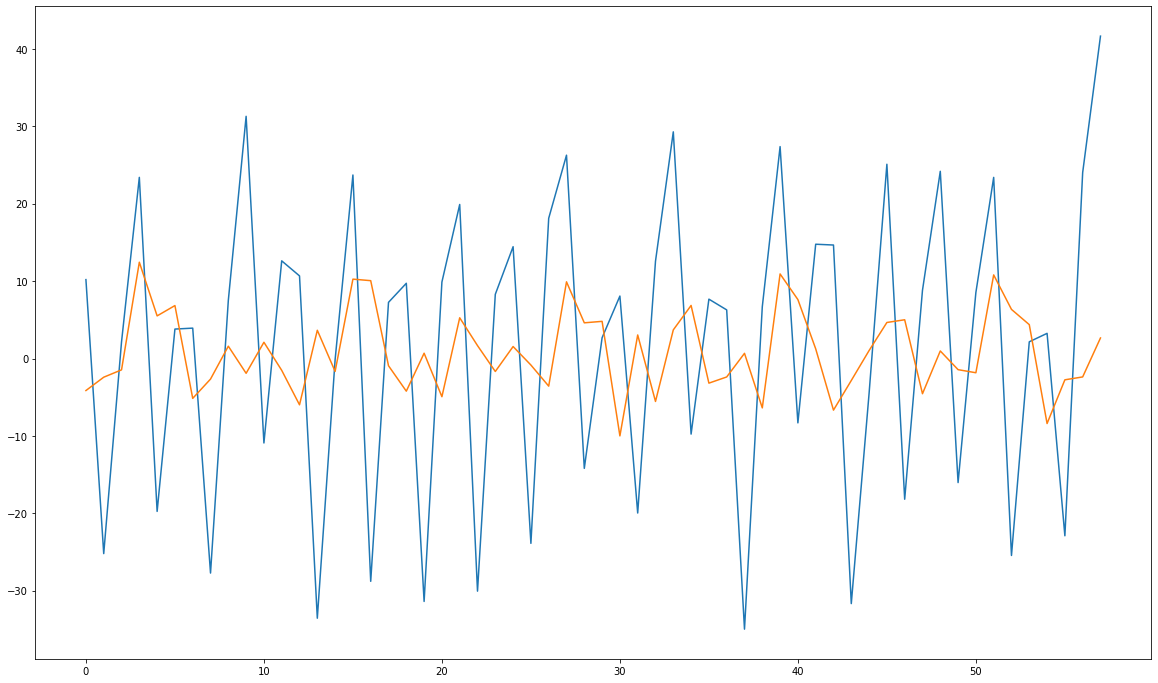

RMSE of different interval for MA model is :  11.894175747759085
RSquared of different interval for MA model is :  0.0008787988135901951
nse of different interval for MA model is :  -0.24234202206151023


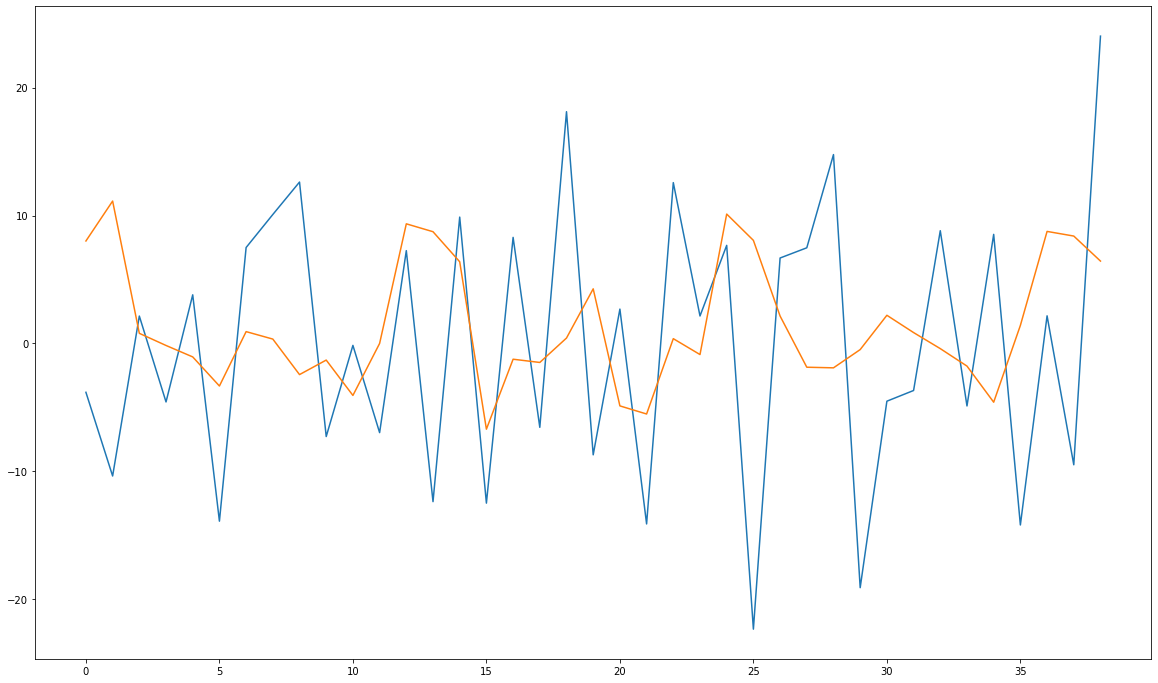

RMSE of different interval for MA model is :  23.226796459842117
RSquared of different interval for MA model is :  0.012684799633029839
nse of different interval for MA model is :  0.0018689225345565053


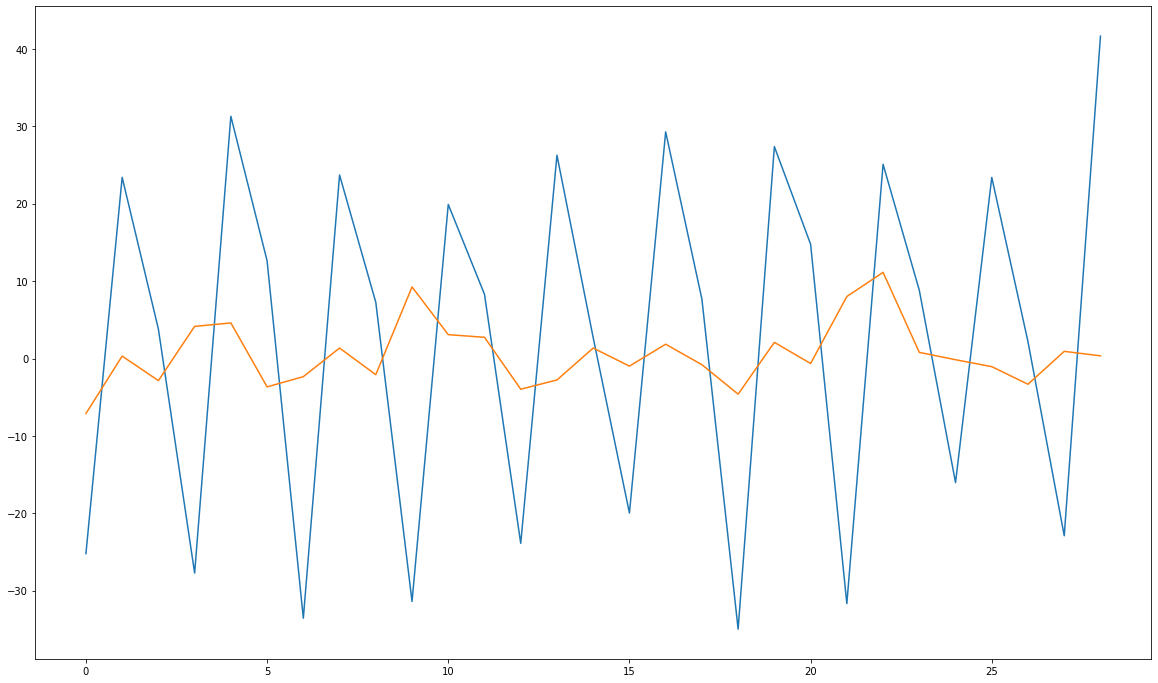

In [148]:
data1 = df['double_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(0, 0, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for MA model is : ",rmse)
  print("RSquared of different interval for MA model is : ",r_squared)
  print("nse of different interval for MA model is : ",nse1)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [149]:
data = df['seas_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(0, 0, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for MA model is : ",rmse)
print("RSquared for MA model is : ",r_squared)
print("nse for MA model is : ",nse1)

RMSE for MA model is :  6.993509432609987
RSquared for MA model is :  0.6139925033730245
nse for MA model is :  0.579418385874631


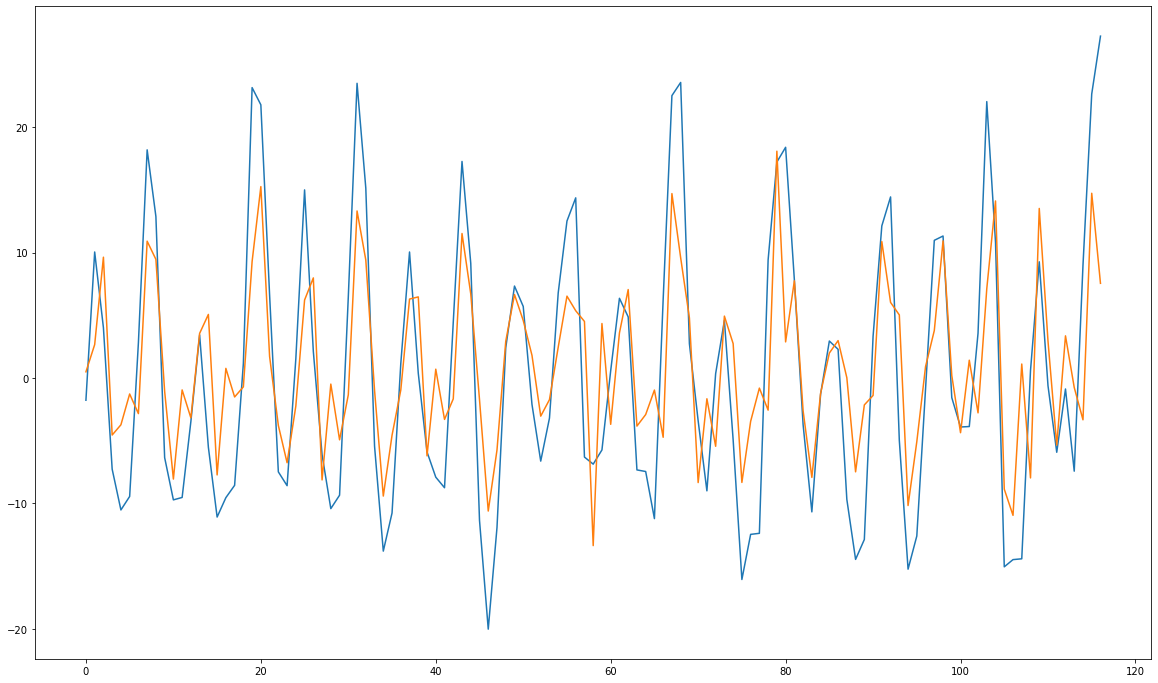

In [150]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

**ARMA model**

RMSE of different interval for ARMA model is :  27.49131254121852
RSquared of different interval for ARMA model is :  0.6844442132830189
nse of different interval for ARMA model is :  -0.9367365629882276


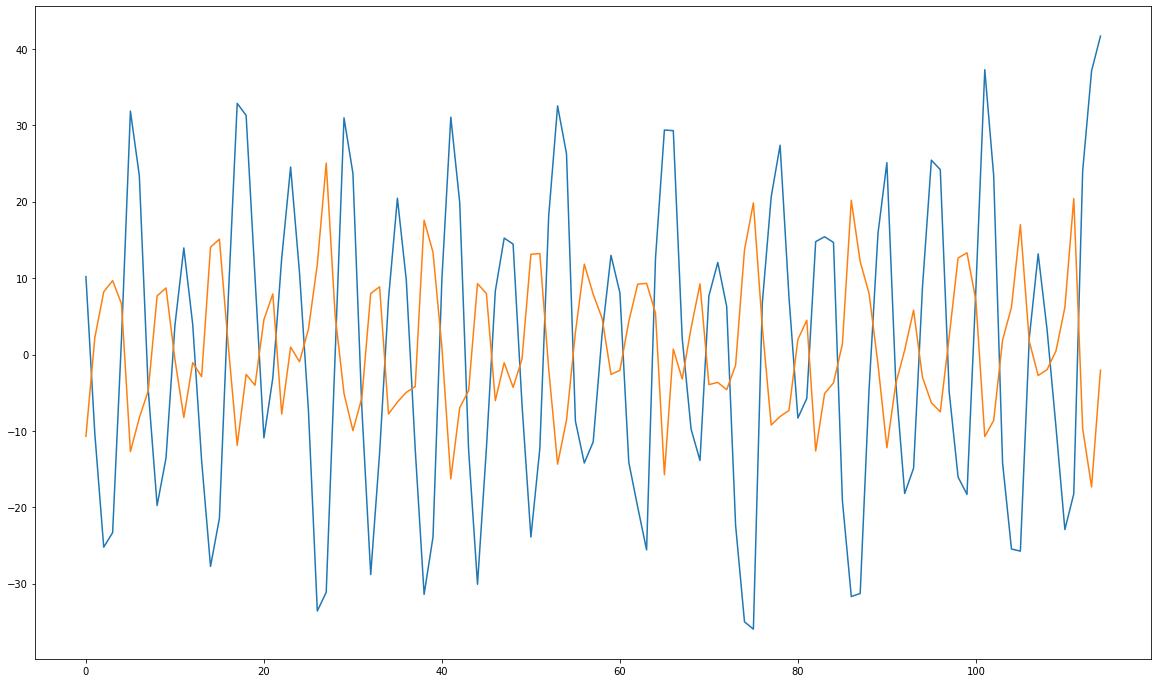

RMSE of different interval for ARMA model is :  20.840828014779596
RSquared of different interval for ARMA model is :  0.00015867280443024562
nse of different interval for ARMA model is :  -0.1403152854032108


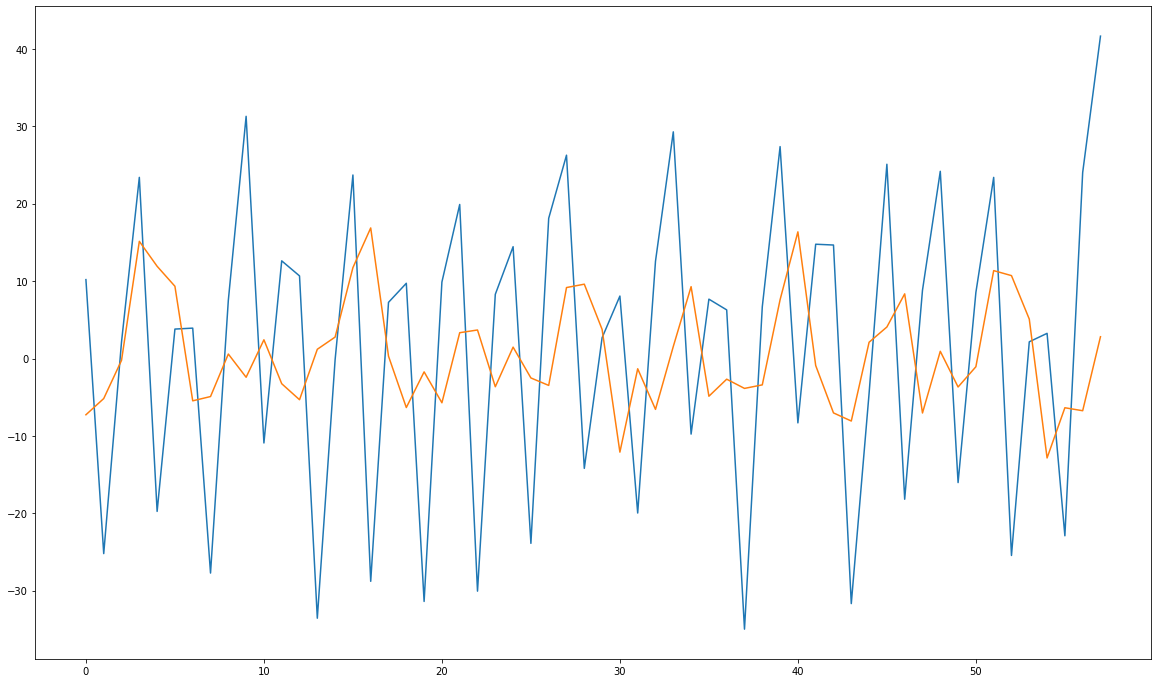

RMSE of different interval for ARMA model is :  13.462058957040941
RSquared of different interval for ARMA model is :  0.011638101112101134
nse of different interval for ARMA model is :  -0.5914589803210275


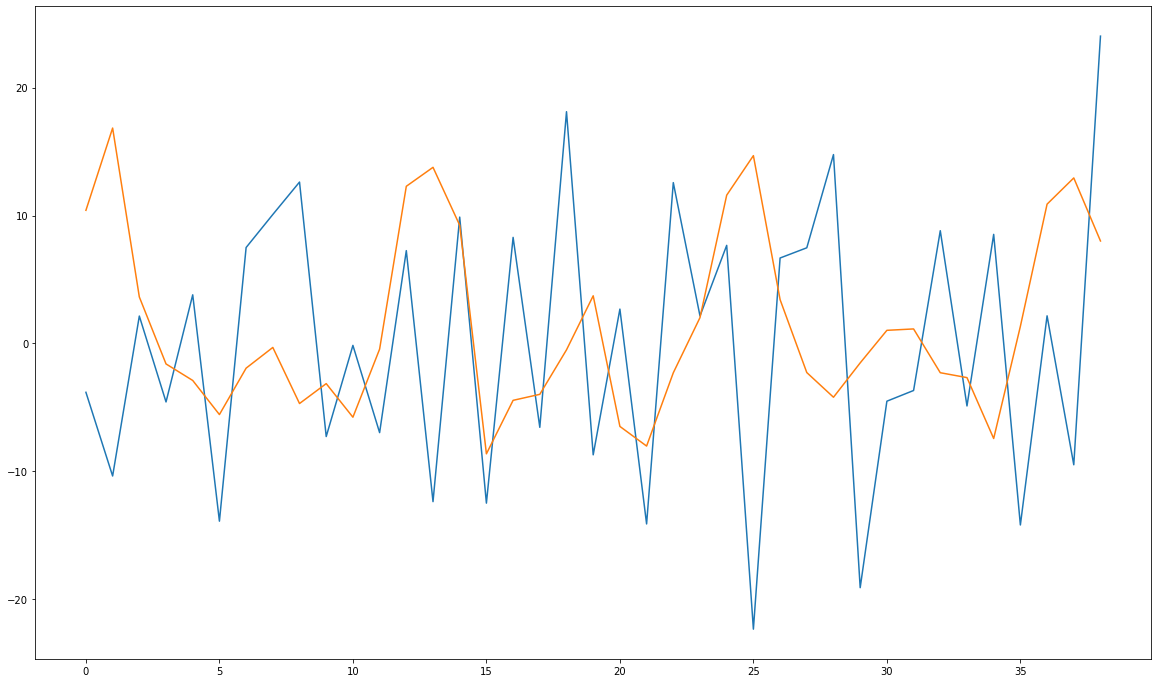

RMSE of different interval for ARMA model is :  23.27833721903628
RSquared of different interval for ARMA model is :  0.017470676651102777
nse of different interval for ARMA model is :  -0.0025657408291337447


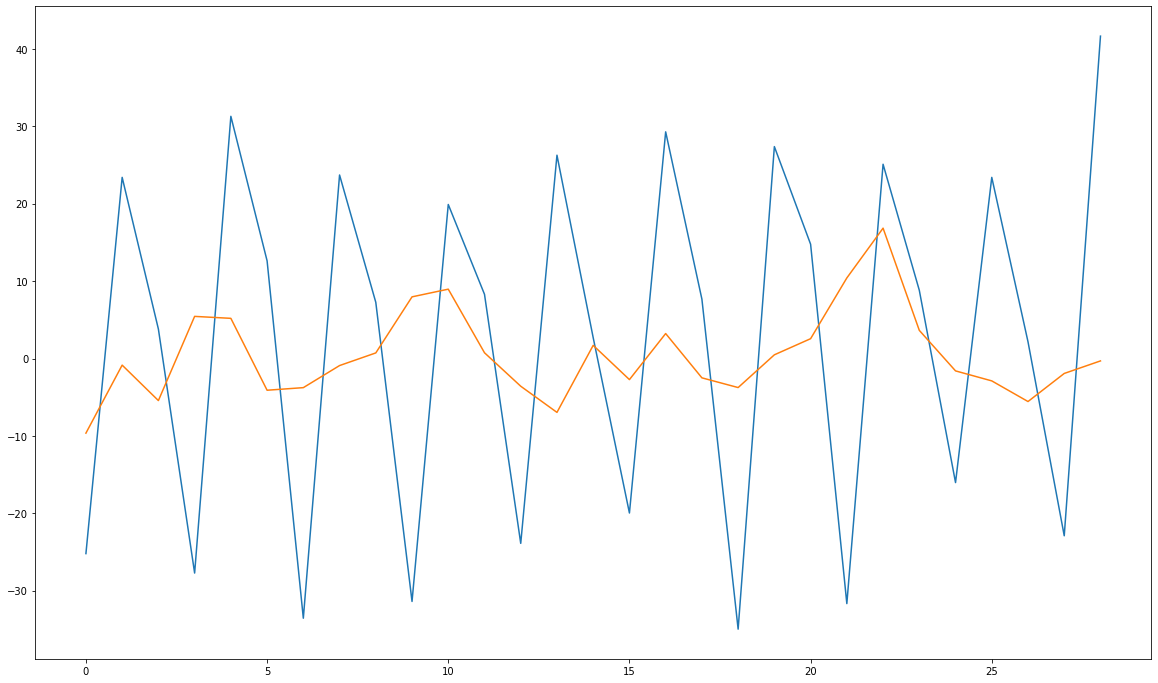

In [151]:
data1 = df['double_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(3, 0, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for ARMA model is : ",rmse)
  print("RSquared of different interval for ARMA model is : ",r_squared)
  print("nse of different interval for ARMA model is : ",nse1)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [152]:
data = df['seas_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(3, 0, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for ARMA model is : ",rmse)
print("RSquared for ARMA model is : ",r_squared)
print("nse for ARMA model is : ",nse1)

RMSE for ARMA model is :  6.029548615264104
RSquared for ARMA model is :  0.6967091577958648
nse for ARMA model is :  0.6873707881240944


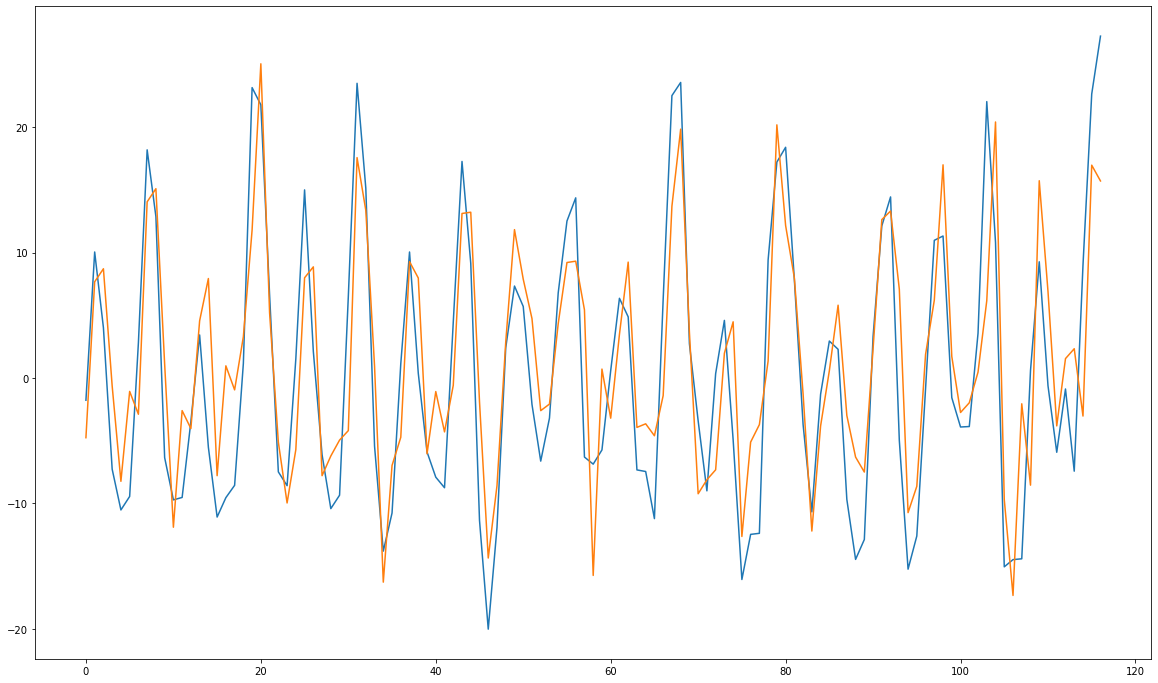

In [153]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

**ARIMA model**

RMSE of different interval for ARIMA model is :  27.802504425817457
RSquared of different interval for ARIMA model is :  0.7370413752503351
nse of different interval for ARIMA model is :  -0.9808310642089544


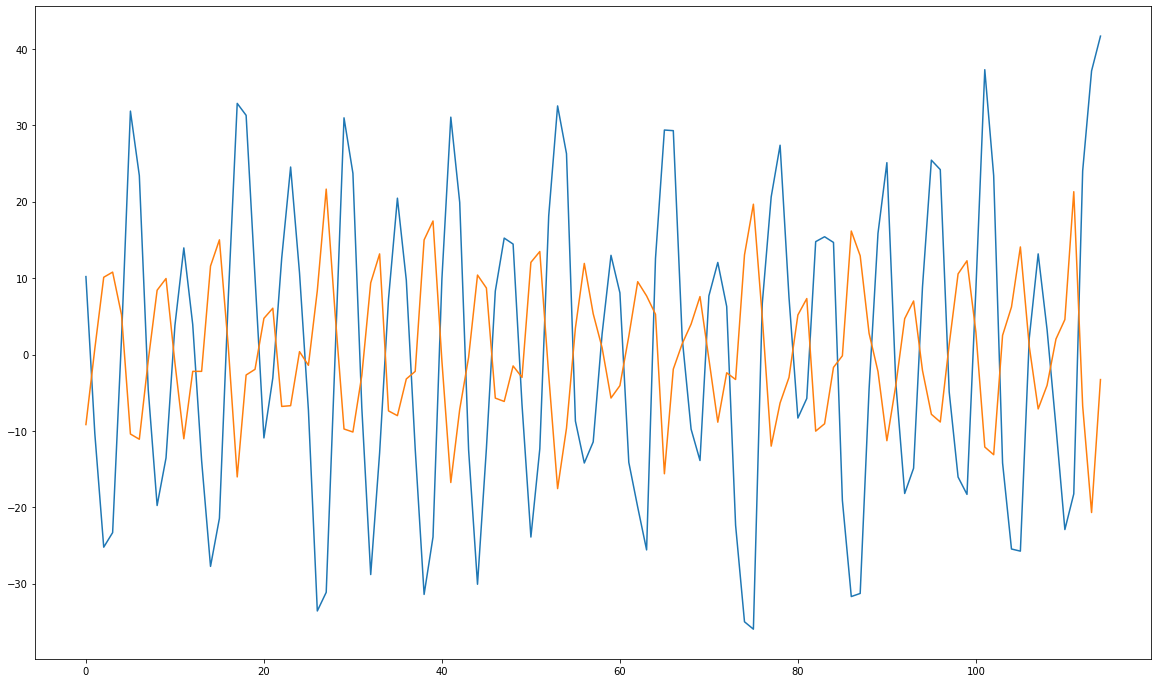

RMSE of different interval for ARIMA model is :  20.90598951553997
RSquared of different interval for ARIMA model is :  0.0013215995618546341
nse of different interval for ARIMA model is :  -0.14745711458237132


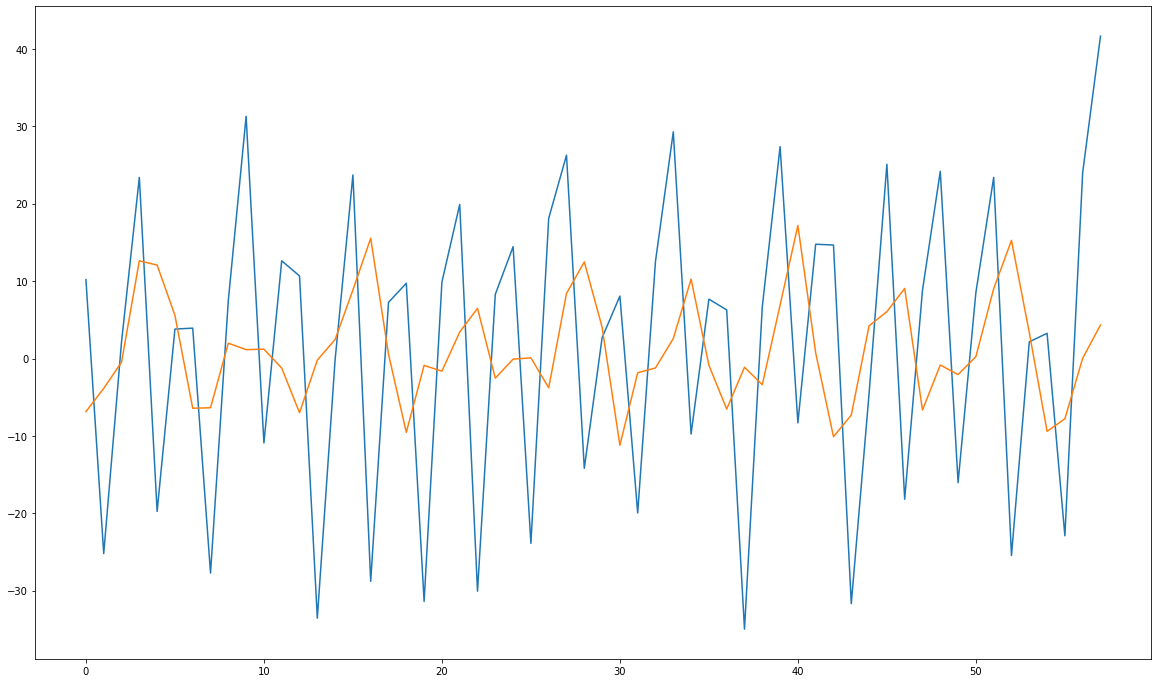

RMSE of different interval for ARIMA model is :  13.32709282346022
RSquared of different interval for ARIMA model is :  0.016327501237674444
nse of different interval for ARIMA model is :  -0.5597080655421871


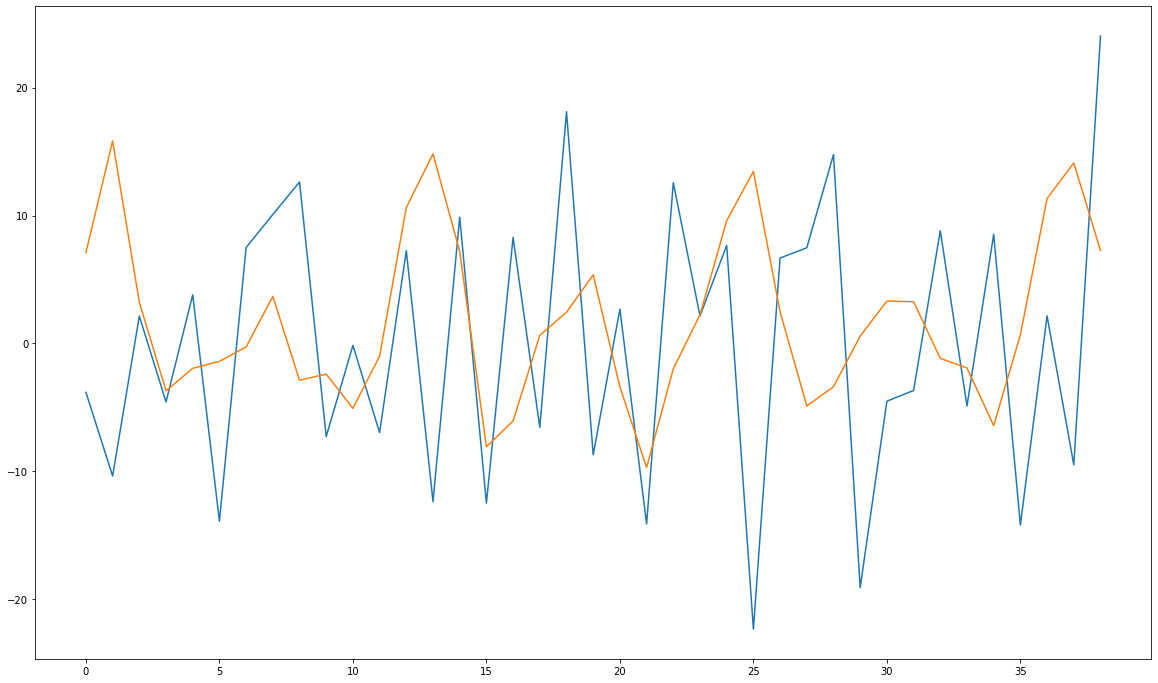

RMSE of different interval for ARIMA model is :  22.599295309010998
RSquared of different interval for ARIMA model is :  0.06098867792274121
nse of different interval for ARIMA model is :  0.05507194394116266


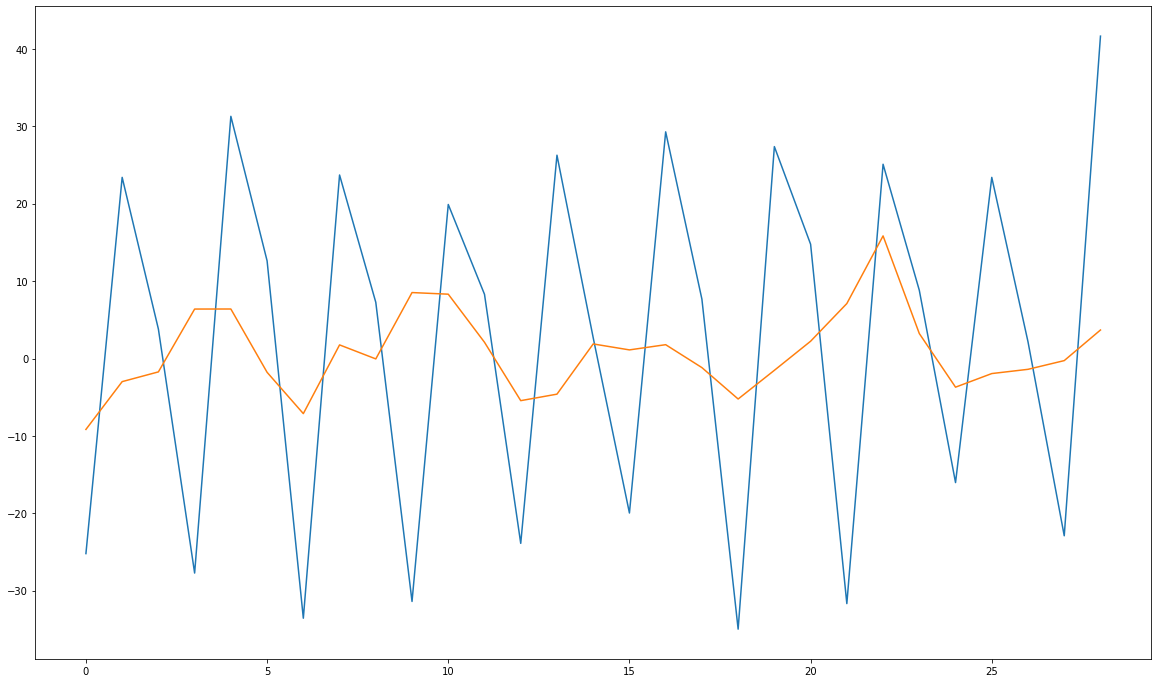

In [154]:
data1 = df['double_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(3, 1, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for ARIMA model is : ",rmse)
  print("RSquared of different interval for ARIMA model is : ",r_squared)
  print("nse of different interval for ARIMA model is : ",nse1)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [155]:
data = df['seas_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(3, 1, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for ARIMA model is : ",rmse)
print("RSquared for ARIMA model is : ",r_squared)
print("nse for ARIMA model is : ",nse1)

RMSE for ARIMA model is :  6.088329962506192
RSquared for ARIMA model is :  0.6833675953185462
nse for ARIMA model is :  0.6812455061548528


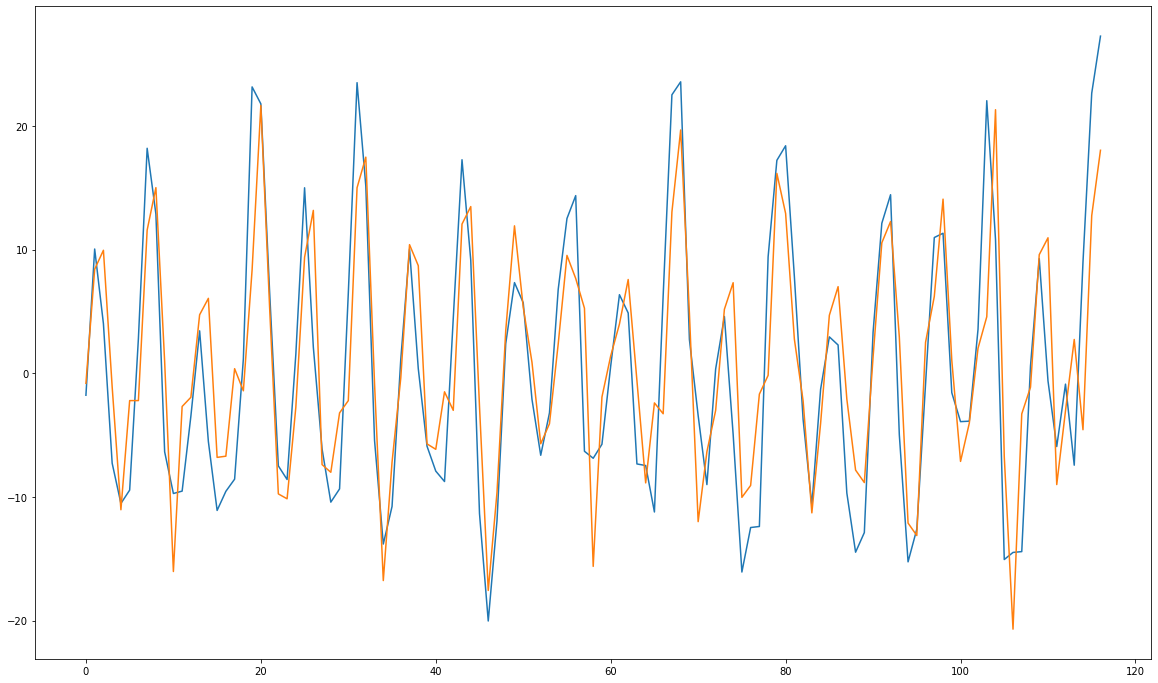

In [156]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

**SARIMA model**

RMSE of different interval for SARIMA model is :  103.19293487064702
RSquared of different interval for SARIMA model is :  0.21000820122967473
nse of different interval for SARIMA model is :  -113.22547356489656


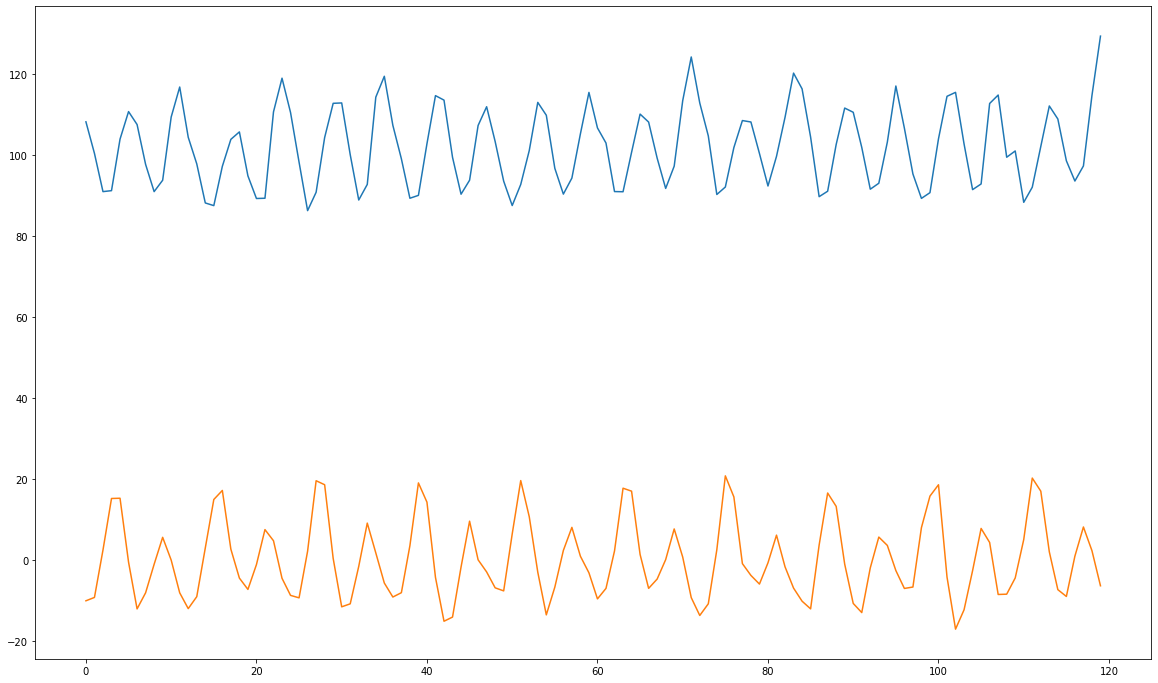

RMSE of different interval for SARIMA model is :  102.44439884666146
RSquared of different interval for SARIMA model is :  0.008331697796034399
nse of different interval for SARIMA model is :  -100.65344009588199


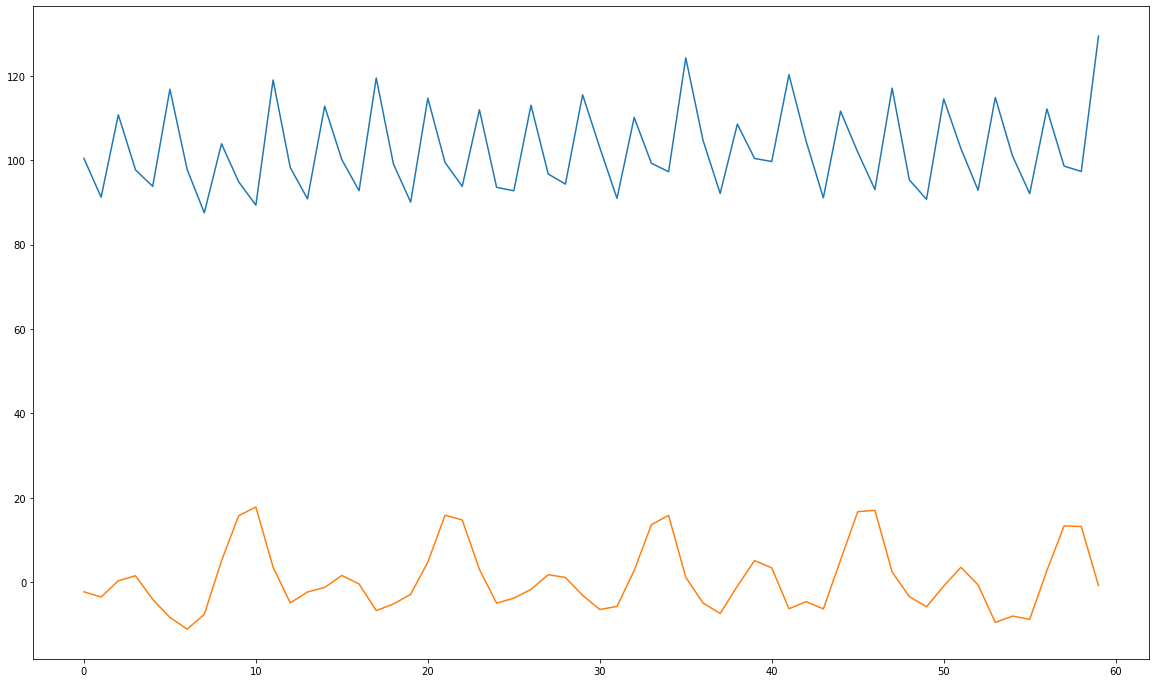

RMSE of different interval for SARIMA model is :  102.824697820024
RSquared of different interval for SARIMA model is :  0.003765154378578105
nse of different interval for SARIMA model is :  -60.37275284944083


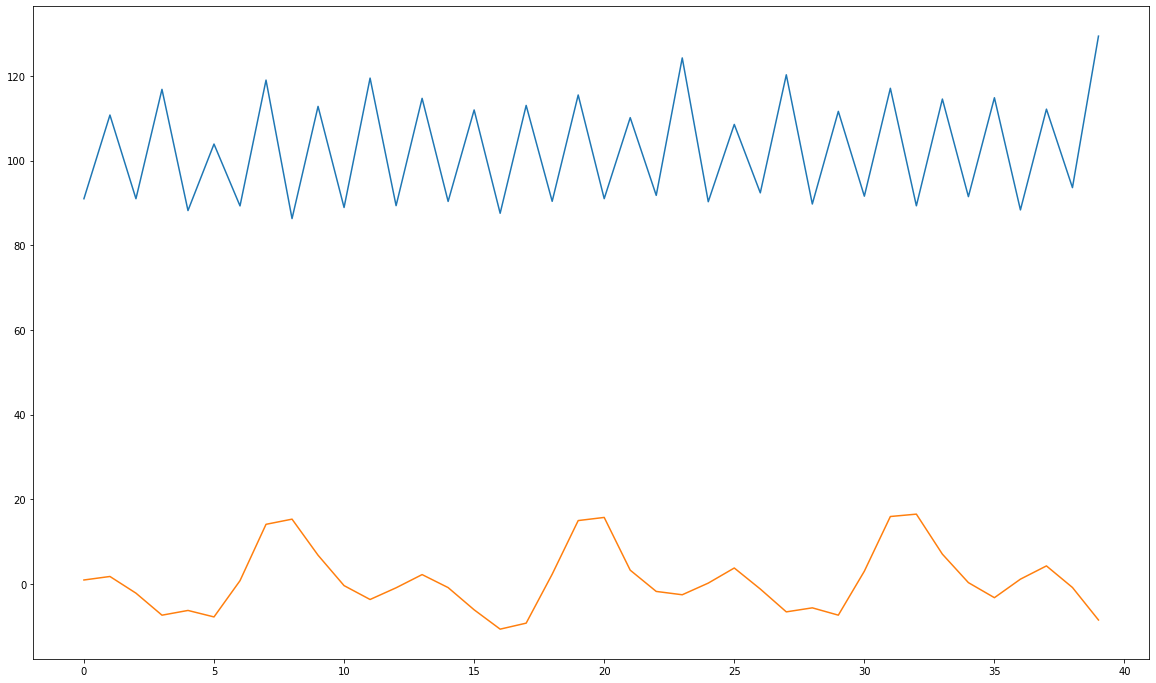

RMSE of different interval for SARIMA model is :  103.86735595461369
RSquared of different interval for SARIMA model is :  2.731250887878284e-06
nse of different interval for SARIMA model is :  -72.40971811140149


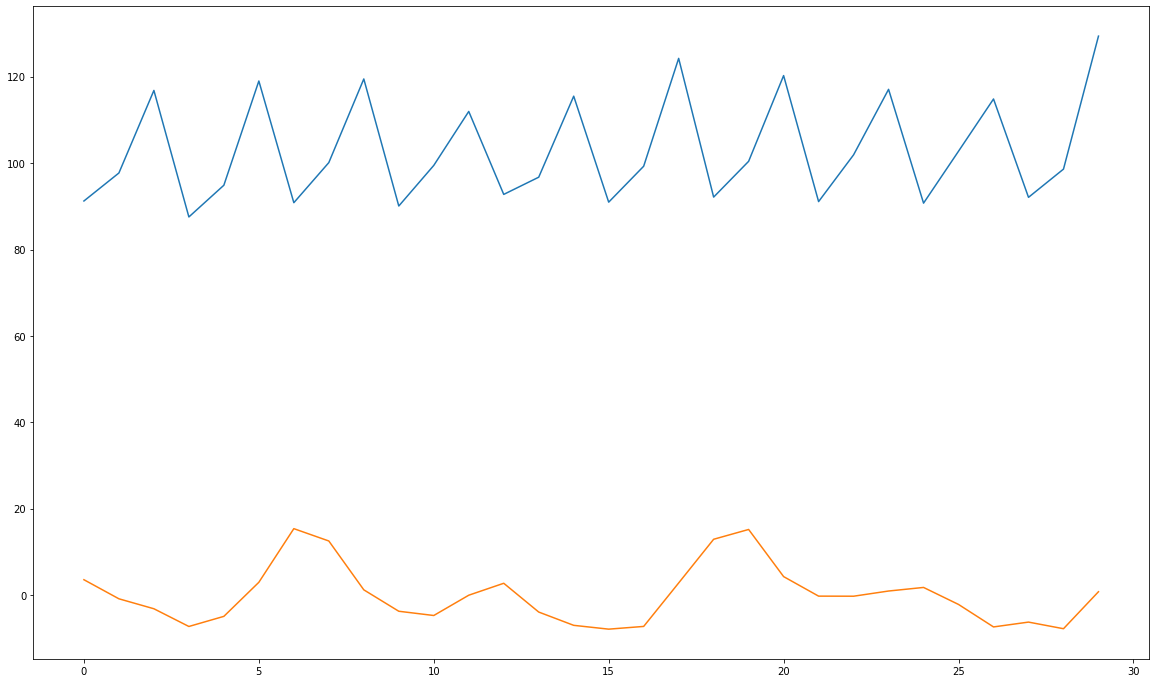

In [157]:
data1 = df['IPG2211A2N'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
  model_fit = mod.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for SARIMA model is : ",rmse)
  print("RSquared of different interval for SARIMA model is : ",r_squared)
  print("nse of different interval for SARIMA model is : ",nse1)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [158]:
data = df['IPG2211A2N'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
model_fit = mod.fit()
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5234      0.046     11.370      0.000       0.433       0.614
ma.L1         -0.9540      0.018    -52.589      0.000      -0.990      -0.918
ar.S.L12    2.268e-06      0.052   4.37e-05      1.000      -0.102       0.102
ma.S.L12      -0.7599      0.044    -17.304      0.000      -0.846      -0.674
sigma2         5.9672      0.361     16.537      0.000       5.260       6.674


In [159]:
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for SARIMA model is : ",rmse)
print("RSquared for SARIMA model is : ",r_squared)
print("nse for SARIMA model is : ",nse1)

RMSE for SARIMA model is :  2.976103161173307
RSquared for SARIMA model is :  0.9069750352401902
nse for SARIMA model is :  0.9049922570033124


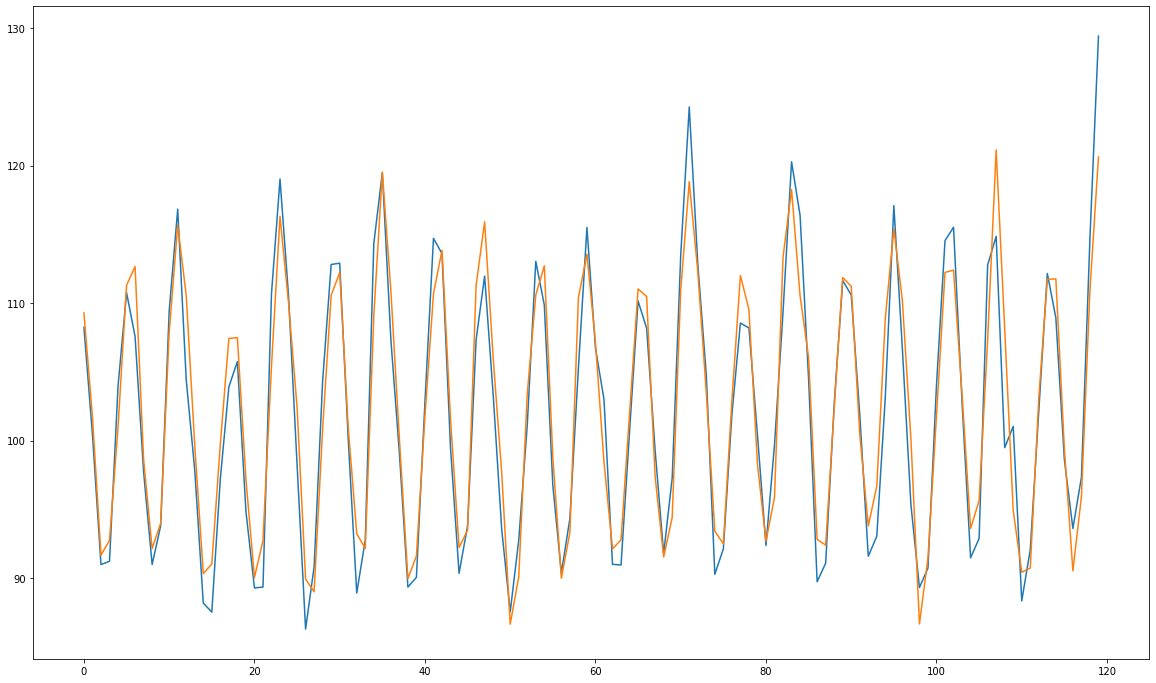

In [160]:
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

Based on RMSE value of different model such as AR, MA, ARMA, ARIMA, SARIMA, the model which is giving low RMSE value is ARMA(3,0,3) model and is the best model for this.